 ## Lab - Week 10 - Dropout


### Ways to reduce overfitting in neural networks - all come at a cost
 - Getting more training data
 - Reducing the capacity of the network (last week's lab)
 - Adding weight regularization (last week's lab)
 - Adding dropout (the subject for this week)

### Typical training and validation loss over time
![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*0VWDpLIRcMTssDf-zyOR4w.jpeg)

## Using dropout to reduce overfitting

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his
students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of
output features of the layer during training. Let's say a given layer would normally have returned a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a
given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. `[0, 0.5,
1.3, 0, 1.1]`. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test
time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to
balance for the fact that more units are active than at training time.

![dropout](https://cdn-images-1.medium.com/max/1600/1*iWQzxhVlvadk6VAJjsgXgg.png)

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it, e.g.:
```python
model.add(layers.Dropout(0.5))
```

In [1]:
import keras
keras.__version__

'3.8.0'

### Part 1: Load and Prepare Data - IMDB dataset (same as last week)

In [2]:
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**As a routine, perform a sanity check on the dataset to understand the shape of the train and test inputs and outputs, and print out a sample of the data.**

In [3]:
#TODO
#your code here

# Sanity check on the dataset
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Print a sample data point
print("\nSample of vectorized x_train[0]:")
print(x_train[0][:50])  # Print only the first 50 elements for readability

# Print the corresponding label
print(f"\nSample label for x_train[0]: {y_train[0]}")


Shape of x_train: (25000, 10000)
Shape of x_test: (25000, 10000)
Shape of y_train: (25000,)
Shape of y_test: (25000,)

Sample of vectorized x_train[0]:
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0.]

Sample label for x_train[0]: 1.0


### Part 2: Build a Simple Neural Network Model
Objective: Create a basic neural network model using Keras.

**Questions**
- What type of classification problem are we solving?
- How many neurons should there be in the output layer?
- What should be the activation function of the output layer?
- What loss function should be used?
- What activation function should be used on the hidden layers?


Build a sequential model with ne dense layer with 8 units and train it for 20 epochs.

Complete the code below:

In [4]:
# TODO fix this code
  # Add a single hidden layer with 8 units and proper activation
  # Compile the model with an appropriate optimizer, loss function, and evaluation metric.
  # Show the summary of the model

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))  # Hidden layer with 8 units
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with 1 unit for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()

# Train the model for 20 epochs
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │          80,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,017 (312.57 KB)

 Trainable params: 80,017 (312.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.7447 - loss: 0.5671 - val_accuracy: 0.8717 - val_loss: 0.3652
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8984 - loss: 0.3069 - val_accuracy: 0.8834 - val_loss: 0.3080
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9224 - loss: 0.2387 - val_accuracy: 0.8878 - val_loss: 0.2898
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9356 - loss: 0.2009 - val_accuracy: 0.8876 - val_loss: 0.2850
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9448 - loss: 0.1778 - val_accuracy: 0.8861 - val_loss: 0.2852
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9530 - loss: 0.1548 - val_accuracy: 0.8845 - val_loss: 0.2895
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9557 - loss: 0.1422 - val_accuracy: 0.8821 - val_loss: 0.2963
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9605 - loss: 0.1295 - val_accuracy: 0.8786 - v

In [5]:
# Train the model
hist_a = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
print("Test accuracy:", evaluation_results[1])

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9924 - loss: 0.0489 - val_accuracy: 0.8607 - val_loss: 0.4639
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9929 - loss: 0.0468 - val_accuracy: 0.8601 - val_loss: 0.4771
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9943 - loss: 0.0421 - val_accuracy: 0.8586 - val_loss: 0.4929
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9941 - loss: 0.0398 - val_accuracy: 0.8576 - val_loss: 0.5052
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9951 - loss: 0.0372 - val_accuracy: 0.8566 - val_loss: 0.5223
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9956 - loss: 0.0341 - val_accuracy: 0.8557 - val_loss: 0.5384
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9960 - loss: 0.0322 - val_accuracy: 0.8553 - val_loss: 0.5507
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9969 - loss: 0.0300 - val_accuracy: 0.8547 - v

### Part 3: Visualize Training and Validation Performance

The function below can be used later to plot the loss and accuracy from the model training history

In [6]:
# Helper function

import matplotlib.pyplot as plt
# colors will be used to plot the different models below
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

def plot_history(history, color='blue', prefix=""):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)

    # Make a figure with two subplots side by side
    plt.subplot(1, 2, 1)

    # Plot the loss
    plt.plot(epochs, loss_values, "o",  color=color, label=prefix + " Training loss")
    plt.plot(epochs, val_loss_values, color=color, label=prefix + " Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(framealpha=0.5)
    plt.grid()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    acc_values = history_dict["acc"]
    val_acc_values = history_dict["val_acc"]
    # Skip plotting the training accuracy, it makes the plot harder to read
    # plt.plot(epochs, acc_values, "o", color=color , label=prefix + " Training accuracy")
    plt.plot(epochs, val_acc_values, color=color, label=prefix + " Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(framealpha=0.5)
    plt.grid()

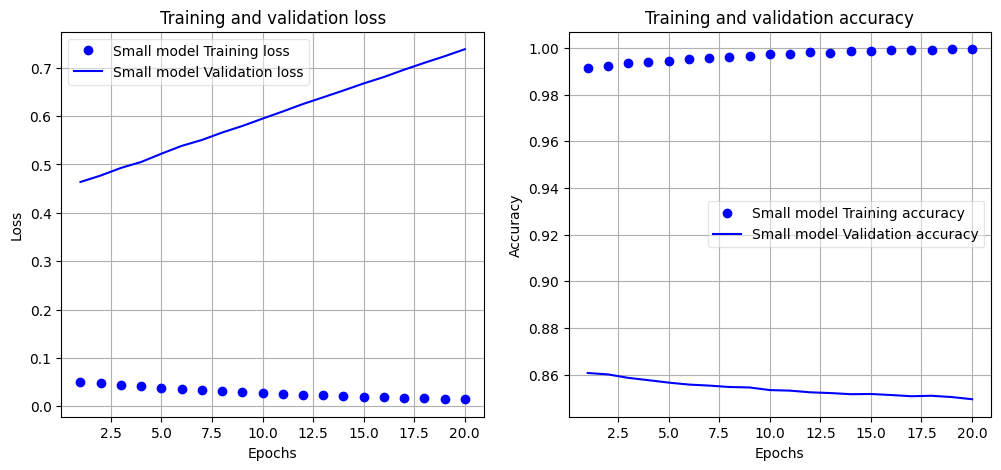

In [8]:
import matplotlib.pyplot as plt

# Define the colors for different models
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Function to plot loss and accuracy
def plot_history(history, color='blue', prefix=""):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    acc_values = history_dict["accuracy"]
    val_acc_values = history_dict["val_accuracy"]
    epochs = range(1, len(loss_values) + 1)

    # Create figure with two subplots
    plt.figure(figsize=(12, 5))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, "o", color=color, label=prefix + " Training loss")
    plt.plot(epochs, val_loss_values, color=color, label=prefix + " Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(framealpha=0.5)
    plt.grid()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc_values, "o", color=color, label=prefix + " Training accuracy")
    plt.plot(epochs, val_acc_values, color=color, label=prefix + " Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(framealpha=0.5)
    plt.grid()

    # Show the plots
    plt.show()

# Using the plotting function
plot_history(hist_a, color='blue', prefix="Small model")


### Part 4: Add Dropout Regularization
Objective: Experiment with dropout layers in the model.

**Instructions:**
1. Add another hidden layer with 8 units
1. Add dropout layers after each hidden layer with a dropout rate of 0.3.
1. Compile the model.
1. Train the model and observe the changes in accuracy.

Complete the code below:

In [ ]:
# TODO: Build a model with 30% Dropout
drp_model = models.Sequential()
...

drp_history = drp_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plot_history(drp_history, color='red', prefix="Dropout 0.3")

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5897 - loss: 0.6630 - val_accuracy: 0.8402 - val_loss: 0.5141
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7771 - loss: 0.5116 - val_accuracy: 0.8775 - val_loss: 0.3806
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8533 - loss: 0.3943 - val_accuracy: 0.8860 - val_loss: 0.3185
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8844 - loss: 0.3275 - val_accuracy: 0.8880 - val_loss: 0.2926
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9087 - loss: 0.2781 - val_accuracy: 0.8883 - val_loss: 0.2801
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9240 - loss: 0.2360 - val_accuracy: 0.8861 - val_loss: 0.2855
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9363 - loss: 0.2091 - val_accuracy: 0.8845 - val_loss: 0.2965
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9454 - loss: 0.1896 - val_accuracy: 0.8849 - v

<Figure size 1200x600 with 0 Axes>

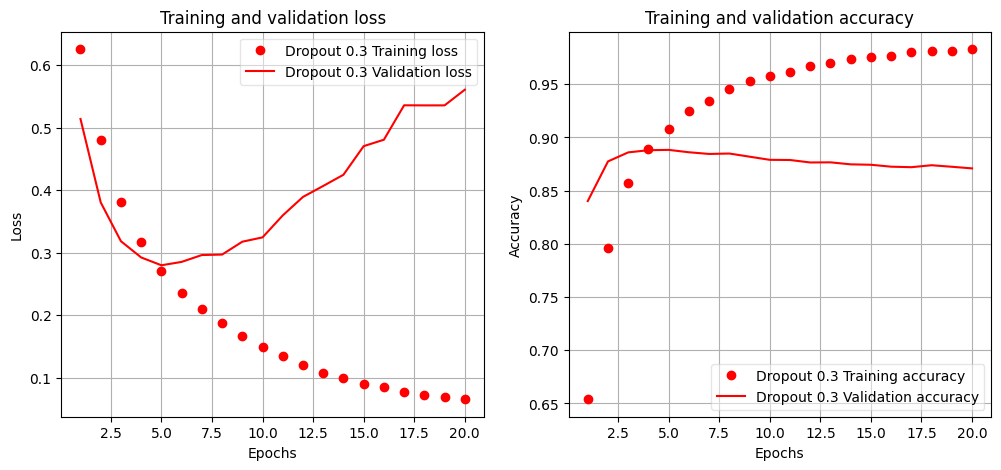

In [9]:
from keras import models, layers

# Build a model with 30% Dropout
drp_model = models.Sequential()
drp_model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))  # First hidden layer
drp_model.add(layers.Dropout(0.3))  # Dropout layer with 30%
drp_model.add(layers.Dense(8, activation='relu'))  # Second hidden layer
drp_model.add(layers.Dropout(0.3))  # Dropout layer with 30%
drp_model.add(layers.Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
drp_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
drp_history = drp_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

# Plot training history
plt.figure(figsize=(12, 6))
plot_history(drp_history, color='red', prefix="Dropout 0.3")


### Part 5: Test Different Dropout Rates
Objective: Compare the model's performance with varying dropout rates.

**Instructions:**
1. Write a loop to create and train models with dropout rates of `[0, 0.2, 0.3, 0.4, 0.5]`.
2. For each model, record the history to plot it later


Complete the code below:

In [10]:
# TODO: try different dropout rates

rates = [0, 0.2, 0.3, 0.4, 0.5]
hists = []

for i, rate in enumerate(rates):
    print(f"Training model with dropout rate: {rate}")

    # Build the model with different dropout rates
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))  # First hidden layer
    model.add(layers.Dropout(rate))  # Dropout layer with dynamic rate
    model.add(layers.Dense(8, activation='relu'))  # Second hidden layer
    model.add(layers.Dropout(rate))  # Dropout layer with dynamic rate
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    hist = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
    hists.append(hist)



Training model with dropout rate: 0
Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6449 - loss: 0.6363 - val_accuracy: 0.8404 - val_loss: 0.4846
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8793 - loss: 0.4179 - val_accuracy: 0.8774 - val_loss: 0.3599
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9213 - loss: 0.2834 - val_accuracy: 0.8881 - val_loss: 0.3049
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9380 - loss: 0.2117 - val_accuracy: 0.8880 - val_loss: 0.2904
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9472 - loss: 0.1731 - val_accuracy: 0.8851 - val_loss: 0.2951
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9573 - loss: 0.1463 - val_accuracy: 0.8807 - val_loss: 0.3051
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9655 - loss: 0.1271 - val_accuracy: 0.8779 - val_loss: 0.3161
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9707 - los

<Figure size 1200x600 with 0 Axes>

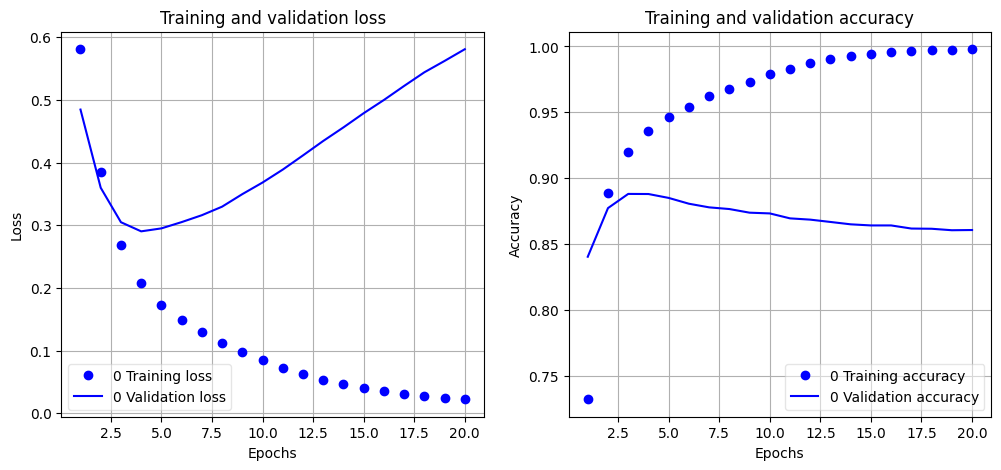

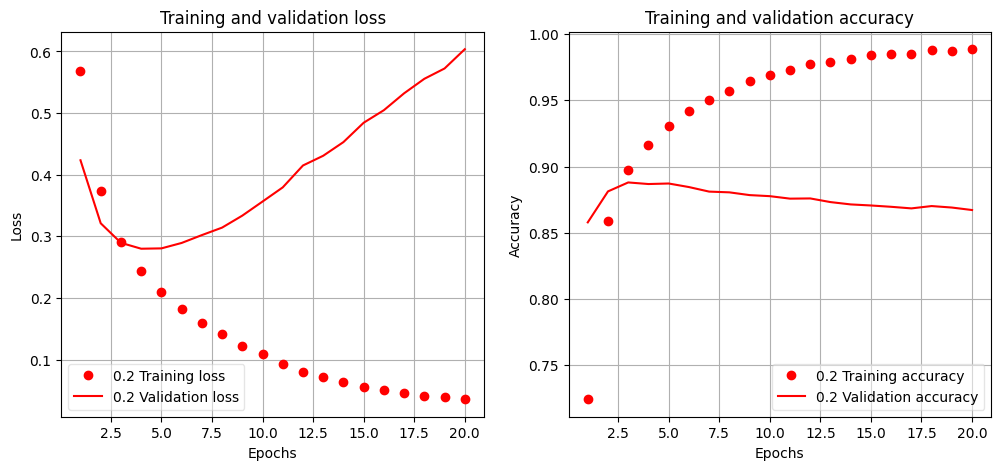

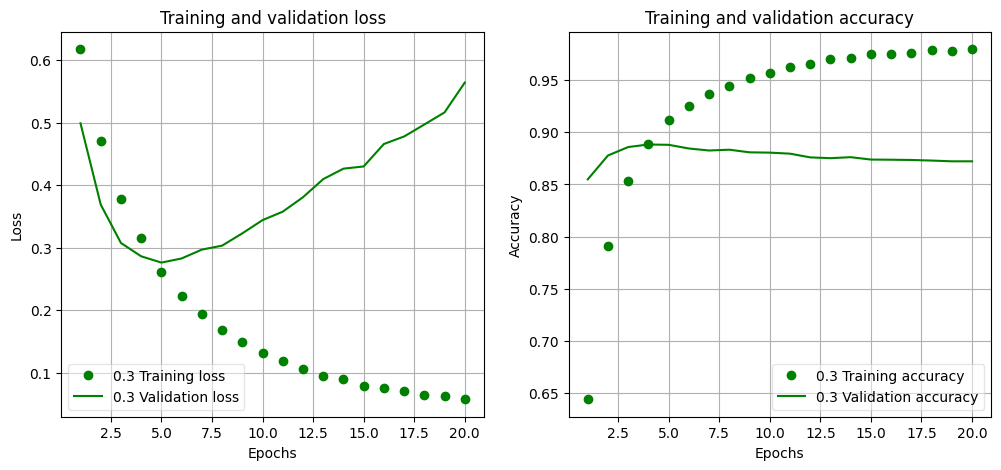

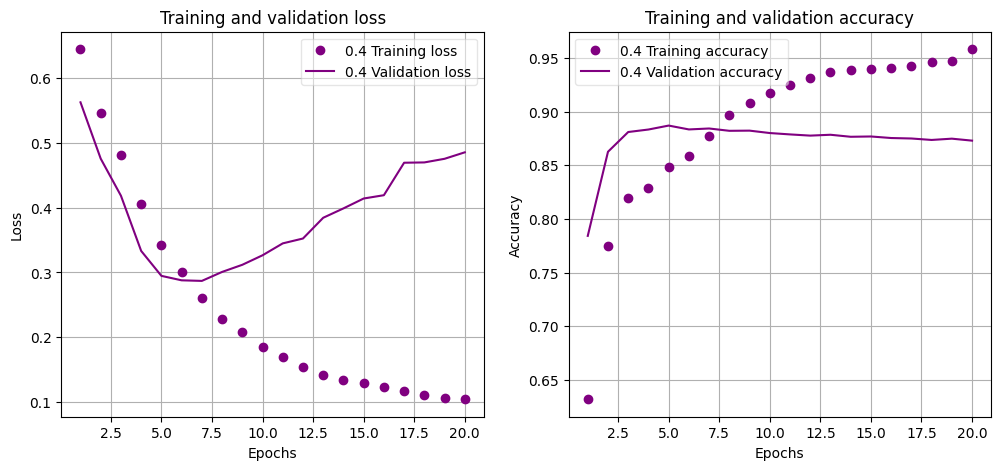

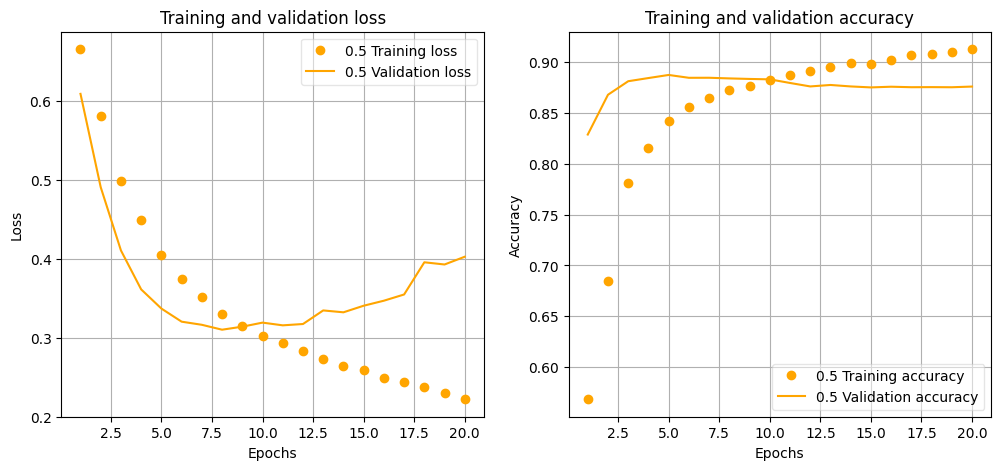

In [11]:
plt.figure(figsize=(12, 6))
for i, hist in enumerate(hists):
    plot_history(hist, colors[i], prefix=str(rates[i]))

### Part 6: Experiment with dropout location
Objective: Compare the model's performance with dropout placed after different layers

**Instructions:**
Create 3 models with a single dropout "layer" placed:
1. Before the first dense layer only
2. After the first dense layer only
3. After the second dense layer only



Complete the code below:

In [12]:
hists_b = [] #append the training history of 3 cases mentioned above
rate = 0.4
#TODO: your code here


# Case 1: Dropout before the first dense layer
model_1 = models.Sequential()
model_1.add(layers.Dropout(rate, input_shape=(10000,)))  # Dropout before first layer
model_1.add(layers.Dense(8, activation='relu'))  # First hidden layer
model_1.add(layers.Dense(8, activation='relu'))  # Second hidden layer
model_1.add(layers.Dense(1, activation='sigmoid'))  # Output layer
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_1 = model_1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
hists_b.append(hist_1)

# Case 2: Dropout after the first dense layer
model_2 = models.Sequential()
model_2.add(layers.Dense(8, activation='relu', input_shape=(10000,)))  # First hidden layer
model_2.add(layers.Dropout(rate))  # Dropout after first layer
model_2.add(layers.Dense(8, activation='relu'))  # Second hidden layer
model_2.add(layers.Dense(1, activation='sigmoid'))  # Output layer
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_2 = model_2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
hists_b.append(hist_2)

# Case 3: Dropout after the second dense layer
model_3 = models.Sequential()
model_3.add(layers.Dense(8, activation='relu', input_shape=(10000,)))  # First hidden layer
model_3.add(layers.Dense(8, activation='relu'))  # Second hidden layer
model_3.add(layers.Dropout(rate))  # Dropout after second layer
model_3.add(layers.Dense(1, activation='sigmoid'))  # Output layer
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_3 = model_3.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
hists_b.append(hist_3)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.5850 - loss: 0.6663 - val_accuracy: 0.8336 - val_loss: 0.5005
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.8412 - loss: 0.4487 - val_accuracy: 0.8792 - val_loss: 0.3517
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.8764 - loss: 0.3267 - val_accuracy: 0.8874 - val_loss: 0.3054
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.8909 - loss: 0.2825 - val_accuracy: 0.8906 - val_loss: 0.2908
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.8996 - loss: 0.2566 - val_accuracy: 0.8873 - val_loss: 0.2869
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9036 - loss: 0.2490 - val_accuracy: 0.8878 - val_loss: 0.2864
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9025 - loss: 0.2375 - val_accuracy: 0.8860 - val_loss: 0.2884
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9071 - loss: 0.2324 - val_accuracy: 0.8852 -

<Figure size 1200x600 with 0 Axes>

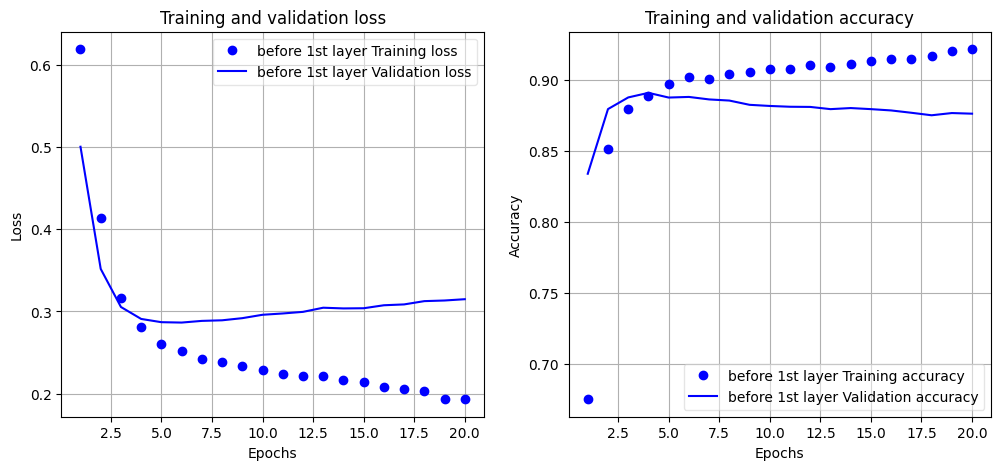

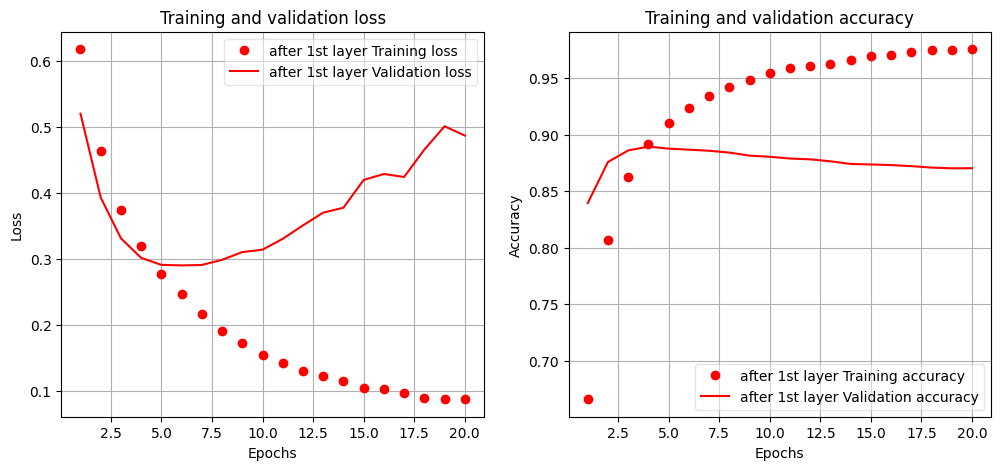

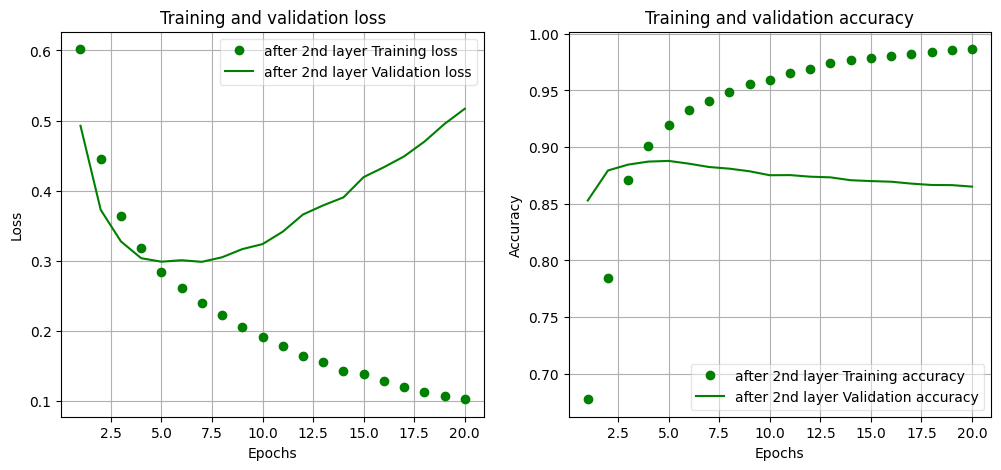

In [13]:
plt.figure(figsize=(12, 6))
prefixes = ['before 1st layer', 'after 1st layer', 'after 2nd layer']
for i, hist in enumerate(hists_b):
    plot_history(hist, colors[i], prefix=prefixes[i])